# Gráficos de las simulaciones de carga y descagra de $NH_3$

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Se crea una función que permite abrir los archivos .txt obtenidos de ```ammonia_test.ipynb```.

In [15]:
def download_tank(path):

    # --------- Paso 1: Leer y procesar los datos del archivo -----------------

    with open(path, 'r') as file:
        data = file.readlines()

    data = data[1:]
    cleaned_data = []
    for element in data:
        cleaned_line = element.strip().split(',')
        cleaned_data.append(cleaned_line)

    time_list = np.array([float(i) / 3600 for i in cleaned_data[0]])
    Tv_avg_list = np.array([float(i) for i in cleaned_data[1]])
    rho_V_avg_list = np.array([float(i) for i in cleaned_data[2]])
    Q_VL_list = np.array([float(i) for i in cleaned_data[3]])
    Q_L_list = np.array([float(i) for i in cleaned_data[4]])
    Q_V_list = np.array([float(i) for i in cleaned_data[5]])
    V_L_list = np.array([float(i) for i in cleaned_data[6]])
    B_L_list = np.array([float(i) for i in cleaned_data[7]])
    BOG_list = np.array([float(i) for i in cleaned_data[8]])
    drho_V_avg_list = np.array([float(i) for i in cleaned_data[9]])
    dV_L_list = np.array([float(i) for i in cleaned_data[10]])
    T_BOG_list = np.array([float(i) for i in cleaned_data[11]])
    Q_Vw_list = np.array([float(i) for i in cleaned_data[12]])
    Q_tot_list = np.array([float(i) for i in cleaned_data[13]])
    d_i = float(cleaned_data[14][0])
    d_o = float(cleaned_data[15][0])
    V_tank = float(cleaned_data[16][0])
    LF = float(cleaned_data[17][0])

    tank_area = np.pi * (d_i ** 2) / 4
    liquid_heights = [V / tank_area for V in V_L_list]  # m

    dict = {
        'Time': time_list,
        'Tv_avg': Tv_avg_list,
        'rho_V_avg': rho_V_avg_list,
        'Q_VL': Q_VL_list,
        'Q_L': Q_L_list,
        'Q_V': Q_V_list,
        'V_L': V_L_list,
        'B_L': B_L_list,
        'BOG': BOG_list,
        'drho_V_avg': drho_V_avg_list,
        'dV_L': dV_L_list,
        'T_BOG': T_BOG_list,
        'Q_Vw': Q_Vw_list,
        'Q_tot': Q_tot_list,
        'd_i': d_i,
        'd_o': d_o,
        'V_tank': V_tank,
        'LF': LF,
        'liquid_heights': liquid_heights
    }
    return dict

Se cargan todos los archivos de texto.

In [16]:
dict_minus_25 = download_tank('data/ammonia_tank_full_data_mL_-25.0_kg_per_s.txt')
dict_minus_25['Label'] = rf' $m_L = $-25 $kg/s$'
dict_minus_25['Flow Rate'] = -25

dict_minus_10 = download_tank('data/ammonia_tank_full_data_mL_-10.0_kg_per_s.txt')
dict_minus_10['Label'] = rf' $m_L = $-10 $kg/s$'
dict_minus_10['Flow Rate'] = -10

dict_minus_5 = download_tank('data/ammonia_tank_full_data_mL_-5.0_kg_per_s.txt')
dict_minus_5['Label'] = rf' $m_L = $-5 $kg/s$'
dict_minus_5['Flow Rate'] = -5

dict_minus_1 = download_tank('data/ammonia_tank_full_data_mL_-1.0_kg_per_s.txt')
dict_minus_1['Label'] = rf' $m_L = $-1 $kg/s$'
dict_minus_1['Flow Rate'] = -1

dict_0 = download_tank('data/ammonia_tank_full_data_mL_0.0_kg_per_s.txt')
dict_0['Label'] = rf' $m_L = $0 $kg/s$'
dict_0['Flow Rate'] = 0

dict_1 = download_tank('data/ammonia_tank_full_data_mL_1.0_kg_per_s.txt')
dict_1['Label'] = rf' $m_L = $1 $kg/s$'
dict_1['Flow Rate'] = 1

dict_5 = download_tank('data/ammonia_tank_full_data_mL_5.0_kg_per_s.txt')
dict_5['Label'] = rf' $m_L = $5 $kg/s$'
dict_5['Flow Rate'] = 5

dict_10 = download_tank('data/ammonia_tank_full_data_mL_10.0_kg_per_s.txt')
dict_10['Label'] = rf' $m_L = $10 $kg/s$'
dict_10['Flow Rate'] = 10


all_data = [dict_minus_25, dict_minus_10, dict_minus_5, dict_minus_1, dict_0, dict_1, dict_5, dict_10]

## Primer gráfico: $V_L$ vs $t$

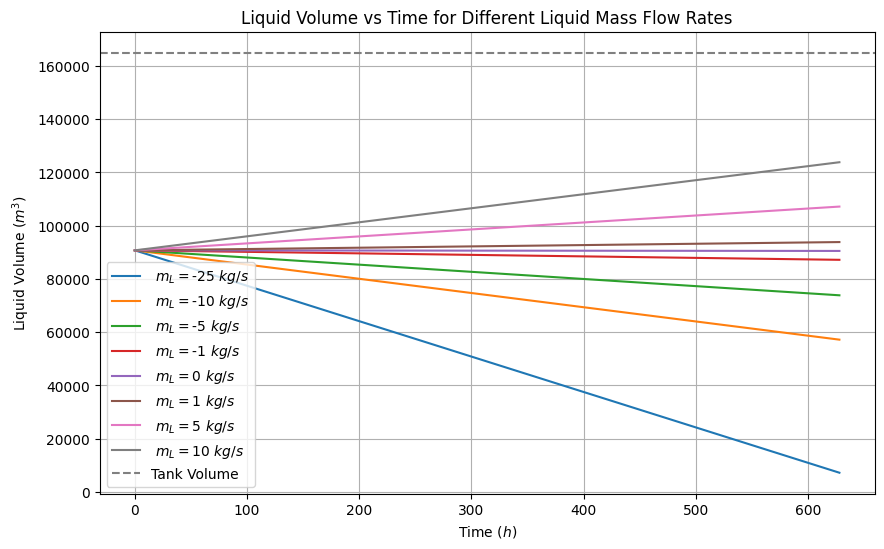

In [17]:
plt.figure(figsize=(10, 6))
for dicts in all_data:
    plt.plot(dicts['Time'], dicts['V_L'], label=dicts['Label'])
plt.axhline(y=dict_10['V_tank'], color='gray', linestyle='--', label='Tank Volume')
plt.legend()
plt.xlabel(r'Time ($h$)')
plt.ylabel(r'Liquid Volume ($m^3$)')
plt.title('Liquid Volume vs Time for Different Liquid Mass Flow Rates')
plt.grid()
plt.show()

Se evidencia que para todos los flujos másicos, la tasa de cambio de volumen dentro del tanque es constante a lo largo del tiempo. 

## Segundo gráfico: $\dot{B}$ vs $t$

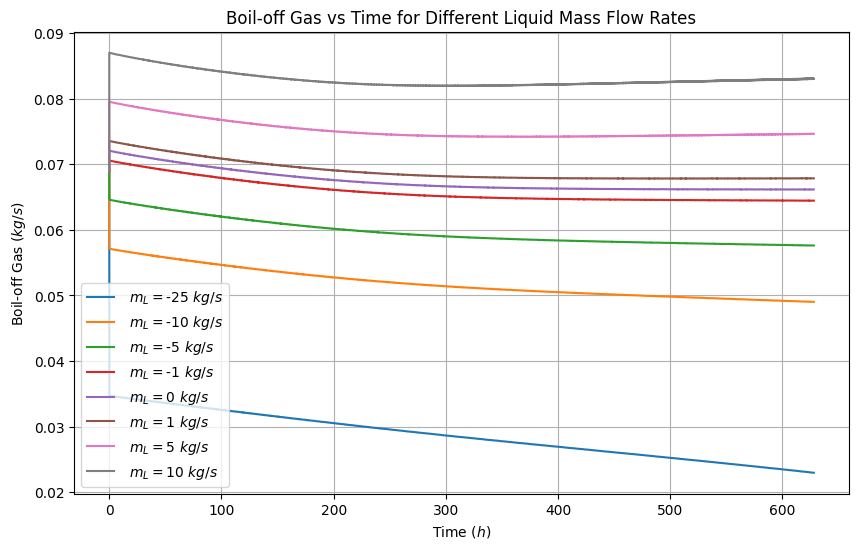

In [18]:
plt.figure(figsize=(10, 6))
for dicts in all_data:
    plt.plot(dicts['Time'], dicts['BOG'], label=dicts['Label'])
plt.legend()
plt.xlabel(r'Time ($h$)')
plt.ylabel(r'Boil-off Gas ($kg/s$)')
plt.title('Boil-off Gas vs Time for Different Liquid Mass Flow Rates')
plt.grid()
plt.show()

Se puede ver que mientras mayor sea el flujo másico de entrada, mayor será el *boil-off gas rate*. Este resultado debe ser de mucha atención para un potencial uso, ya que dependiendo del flujo de entrada, se deberá dimensionar el o los compresores que permitan recuperar este gas evaporado. 

## Tercer gráfico: $\dot{B}_L$ vs $t$

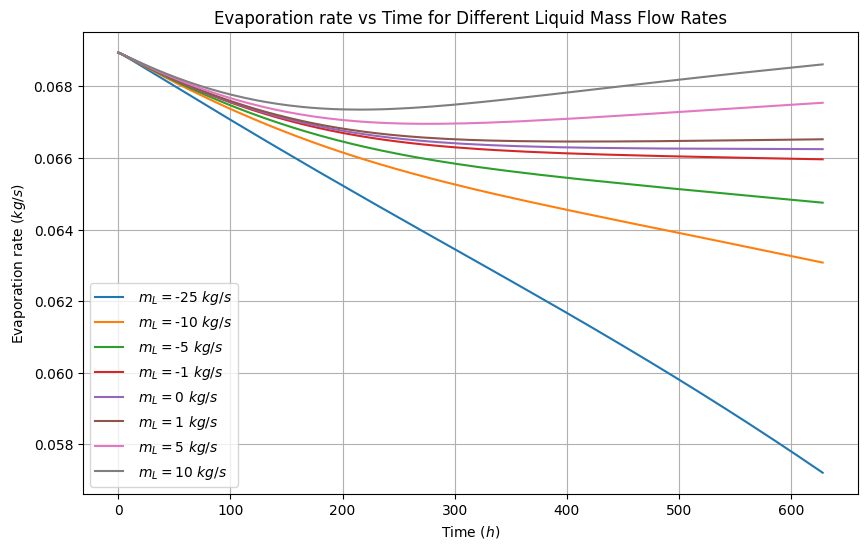

In [19]:
plt.figure(figsize=(10, 6))
for dicts in all_data:
    plt.plot(dicts['Time'], dicts['B_L'], label=dicts['Label'])
plt.legend()
plt.xlabel(r'Time ($h$)')
plt.ylabel(r'Evaporation rate ($kg/s$)')
plt.title('Evaporation rate vs Time for Different Liquid Mass Flow Rates')
plt.grid()
plt.show()

Se puede ver que la tasa de evaporación aumenta en la medida que los flujos másicos aumentan. Esto se debe a que mientras mayor es el volumen de líquido dentro del estanque, mayor es el área de contacto para la transferencia de calor, por lo que se esperaría una mayor evaporación

## Cuarto gráfico: $\overline{T}_V$ vs $t$

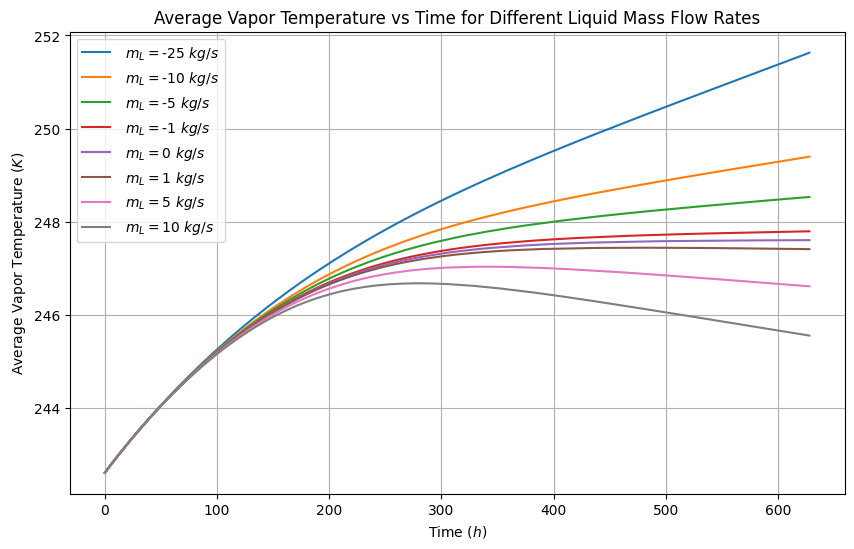

In [20]:
plt.figure(figsize=(10, 6))
for dicts in all_data:
    plt.plot(dicts['Time'], dicts['Tv_avg'], label=dicts['Label'])
plt.legend()
plt.xlabel(r'Time ($h$)')
plt.ylabel(r'Average Vapor Temperature ($K$)')
plt.title('Average Vapor Temperature vs Time for Different Liquid Mass Flow Rates')
plt.grid()
plt.show()

Se puede ver que para un flujo másico menor, la temperatura promedio del gas es mayor. Con un razonamiento similar a la disminución de la tasa de evaporación, esto sucede debido a que aumenta el área para la transferencia de calor con el exterior

## Quinto gráfico: $T_{BOG}$ vs $t$

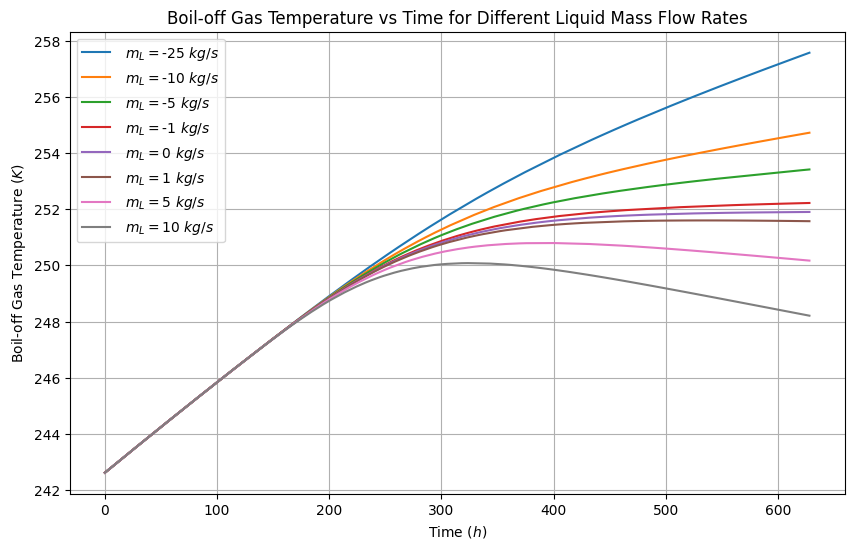

In [21]:
plt.figure(figsize=(10, 6))
for dicts in all_data:
    plt.plot(dicts['Time'], dicts['T_BOG'], label=dicts['Label'])
plt.legend()
plt.xlabel(r'Time ($h$)')
plt.ylabel(r'Boil-off Gas Temperature ($K$)')
plt.title('Boil-off Gas Temperature vs Time for Different Liquid Mass Flow Rates')
plt.grid()
plt.show()

De forma similar a lo obtenido con la temperatura media, mientras menor es el flujo másico mayor es la temperatura a la que sale el gas evacuado.

## Sexto gráfico: $\dot{Q}_i$ vs $t$ (todos los inputs de calor)

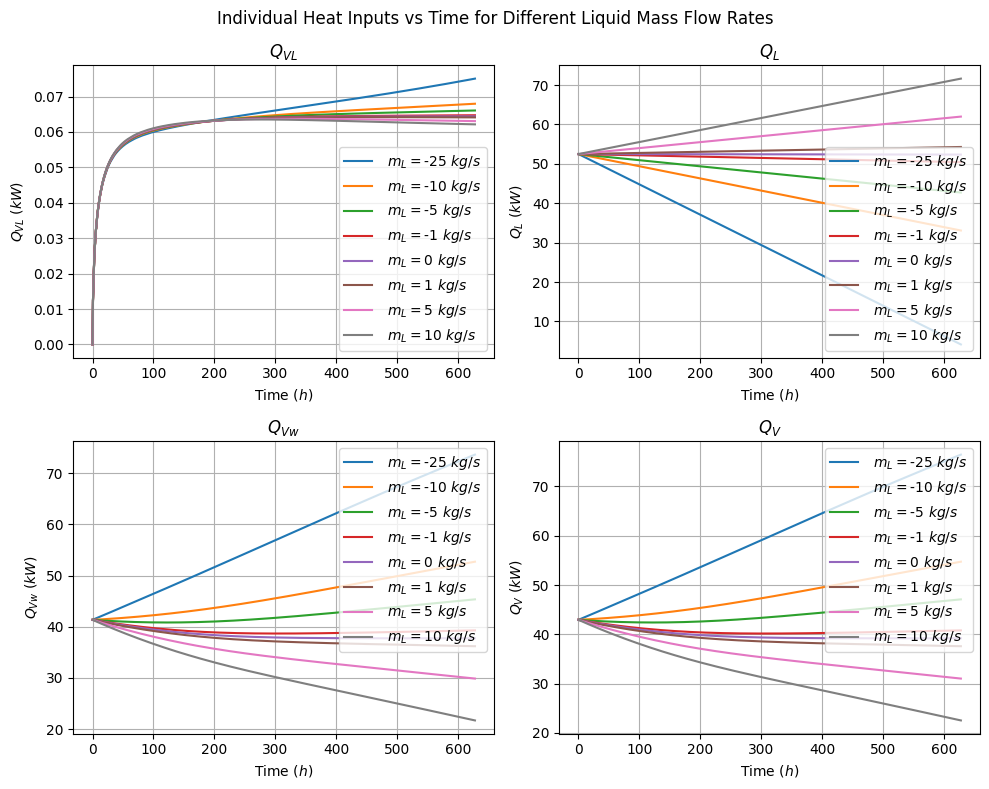

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) # figsize adjusts the figure size

# Q_VL plot
for dicts in all_data:
    axs[0, 0].plot(dicts['Time'], dicts['Q_VL'] / 1e3, label=dicts['Label'])
axs[0, 0].legend()
axs[0, 0].set_xlabel(r'Time ($h$)')
axs[0, 0].set_ylabel(r'$Q_{VL}$ ($kW$)')
axs[0, 0].grid()
axs[0, 0].set_title(r'$Q_{VL}$')

# Q_L plot
for dicts in all_data:
    axs[0, 1].plot(dicts['Time'], dicts['Q_L'] / 1e3, label=dicts['Label'])
axs[0, 1].legend()
axs[0, 1].set_xlabel(r'Time ($h$)')
axs[0, 1].set_ylabel(r'$Q_{L}$ ($kW$)')
axs[0, 1].grid()
axs[0, 1].set_title(r'$Q_{L}$')


# Q_Vw plot
for dicts in all_data:
    axs[1, 0].plot(dicts['Time'], dicts['Q_Vw'] / 1e3, label=dicts['Label'])
axs[1, 0].legend()
axs[1, 0].set_xlabel(r'Time ($h$)')
axs[1, 0].set_ylabel(r'$Q_{Vw}$ ($kW$)')
axs[1, 0].grid()
axs[1, 0].set_title(r'$Q_{Vw}$')

# Q_V plot
for dicts in all_data:
    axs[1, 1].plot(dicts['Time'], dicts['Q_V'] / 1e3, label=dicts['Label'])
axs[1, 1].legend()
axs[1, 1].set_xlabel(r'Time ($h$)')
axs[1, 1].set_ylabel(r'$Q_{V}$ ($kW$)')
axs[1, 1].grid()
axs[1, 1].set_title(r'$Q_{V}$')

plt.suptitle('Individual Heat Inputs vs Time for Different Liquid Mass Flow Rates')
plt.tight_layout()
plt.show()

Se puede ver que con flujos másicos negativos (descarga), aumenta la transferencia de calor hacia el vapor y disminuye hacia el líquido, mientras que el efecto opuesto se aprecia para flujos másicos positivos (carga).

## Séptimo gráfico: $\dot{Q}_{total}$ vs $t$

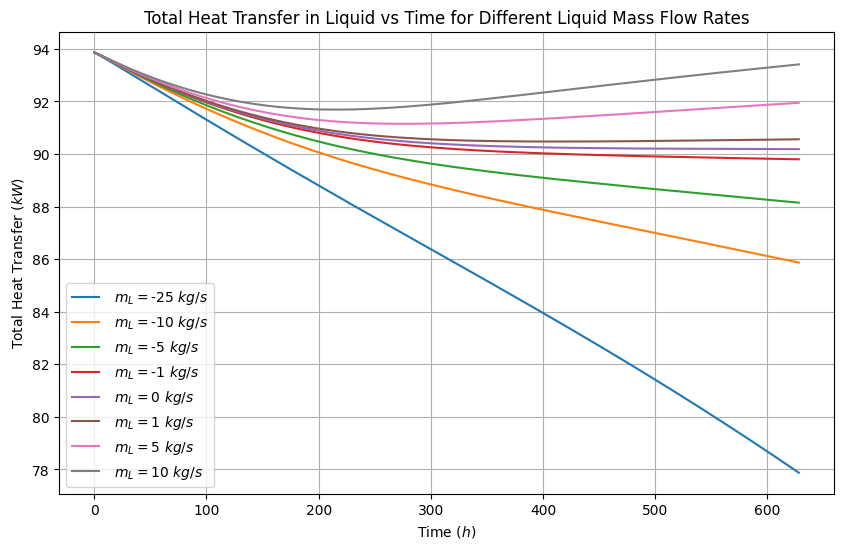

In [23]:
plt.figure(figsize=(10, 6))
for dicts in all_data:
    plt.plot(dicts['Time'], dicts['Q_tot'] / 1e3, label=dicts['Label'])
plt.legend()
plt.xlabel(r'Time ($h$)')
plt.ylabel(r'Total Heat Transfer ($kW$)')
plt.title('Total Heat Transfer in Liquid vs Time for Different Liquid Mass Flow Rates')
plt.grid()
plt.show()

Este gráfico demuestra que la transferencia de calor predominante hacia el líquido es $\dot{Q}_L$

## Octavo gráfico: $\frac{\dot{B}}{\overline{\rho}_V(V_{tank} - V_L)}$ vs $t$

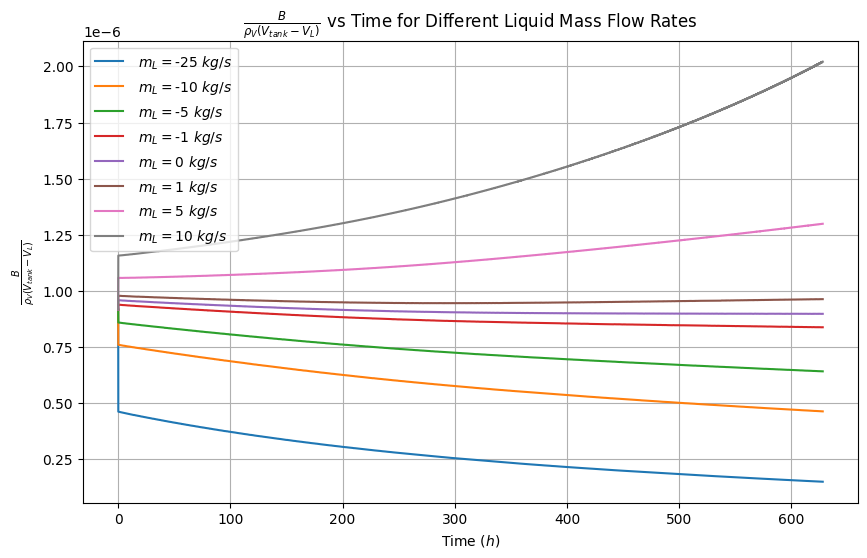

In [37]:
plt.figure(figsize=(10, 6))
for dicts in all_data:
    plt.plot(dicts['Time'], dicts['BOG'] / (dicts['rho_V_avg'] * (dicts['V_tank'] - dicts['V_L'])), label=dicts['Label'])
plt.legend()
plt.xlabel(r'Time ($h$)')
plt.ylabel(r'$\frac{B}{\rho_V (V_{tank} - V_L)}$')
plt.title(r'$\frac{B}{\rho_V (V_{tank} - V_L)}$ vs Time for Different Liquid Mass Flow Rates')
plt.grid()
plt.show()

## Noveno gráfico: $\frac{\dot{B}_L}{V_L}$ vs $t$

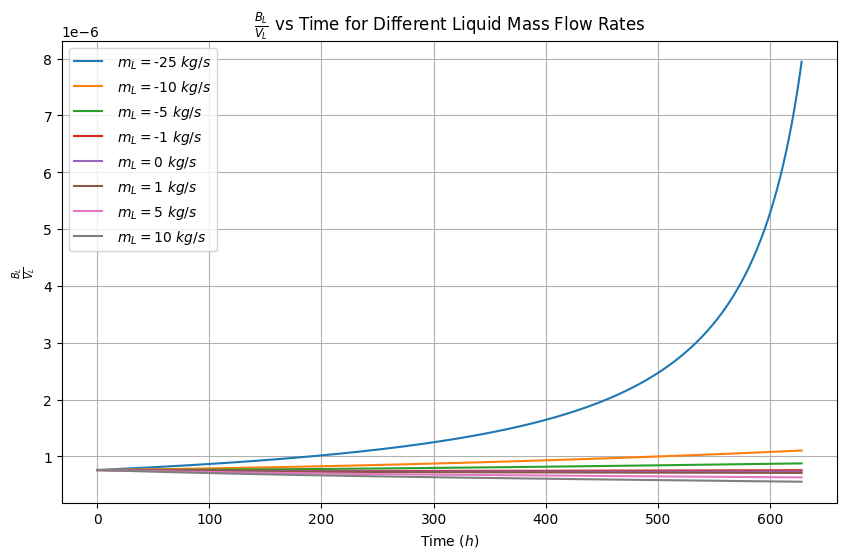

In [38]:
plt.figure(figsize=(10, 6))
for dicts in all_data:
    plt.plot(dicts['Time'], dicts['B_L'] / dicts['V_L'], label=dicts['Label'])
plt.legend()
plt.xlabel(r'Time ($h$)')
plt.ylabel(r'$\frac{B_L}{V_L}$')
plt.title(r'$\frac{B_L}{V_L}$ vs Time for Different Liquid Mass Flow Rates')
plt.grid()
plt.show()

Se puede ver que, si bien se había demostrado que la tasa de evaporación es menor para los flujos másicos negativos, la relación entre la tasa de evaporación y la masa de líquido (que es proporcional a la relación entre la tasa de evaporación y el volumen debido a que la densidad es constante) es mayor mientras mayor es la descarga